In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/house_prices.csv")
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors          view         grade    sqft_above  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.234303      7.656873   1788.390691   
std    4.142051e+04      0.539989      0.766318      1.175459    828.090978   
min    5.200000e+02      1.000000      0.000000      1.000000    290.000000   
25%    5.040000e+03      1.000000      0.000000      7.000000   1190.000000   
50%    7.618000e+03      1.500000      0.000000      7.000000   1560.000000   
75%    1.068800e+04      2.000000      0.000000      8.000000   2210.000000   
max    1.651359e+06      3.500000      4.000000     13.000000   9410.000000   

       sqft_basement      yr_built  yr_renovated       zipcode           lat  \
count   21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean      291.509045   1971.005136     84.402258  98077.939805     47.560053   
std       442.575043     29.373411    401.679240     53.505026      0.138564   
min         0.000000   1900.000000      0.000000  98001.000000     47.155900   
25%         0.000000   1951.000000      0.000000  98033.000000     47.471000   
50%         0.000000   1975.000000      0.000000  98065.000000     47.571800   
75%       560.000000   1997.000000      0.000000  98118.000000     47.678000   
max      4820.000000   2015.000000   2015.000000  98199.000000     47.777600   

               long  sqft_living15     sqft_lot15  
count  21613.000000   21613.000000   21613.000000  
mean    -122.213896    1986.552492   12768.455652  
std        0.140828     685.391304   27304.179631  
min     -122.519000     399.000000     651.000000  
25%     -122.328000    1490.000000    5100.000000  
50%     -122.230000    1840.000000    7620.000000  
75%     -122.125000    2360.000000   10083.000000  
max     -121.315000    6210.000000  871200.000000

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load Data
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ML/house_prices.csv")

# Split Data
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#  Initialize weights and bias
w=np.random.randn(1,x_train.shape[1])
b=0
learning_rate = 0.000001
epochs = 1000

def for_prop(w,b,x_train):
  z=np.dot(w,x_train.T)+b
  return z

def cost(z,y):
  m=y.shape[0]
  j=(1/(2*m))*np.sum(np.square(z-y))
  return j

def back_prop(z,y,x_train):
  m=y.shape[0]
  dw = (1 / m) * np.dot(x_train.T, (z - y.T))
  db = (1 / m) * np.sum(z - y)
  return dw,db

#  Gradient Descent Training
for i in range(epochs):
  z=for_prop(w,b,x_train)
  j=cost(z,y_train)
  dw,db=back_prop(z,y_train,x_train)

  w = w - learning_rate * dw
  b = b - learning_rate * db

  if i % 100 == 0:
        print(f"Epoch {i}, Cost: {j:.2f}")
# Make Predictions
y_pred = for_prop(w, b, x_test)

#  Evaluate Model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# Plot Regression Line (for first feature)
plt.figure(figsize=(8, 6))
plt.scatter(x_test[:, 0], y_test, color='blue', label='Actual')
plt.plot(x_test[:, 0], y_pred, color='red', label='Regression Line')
plt.xlabel('Feature 1')
plt.ylabel('Price')
plt.title('Regression Line: Feature 1 vs Price')
plt.legend()
plt.grid(True)
plt.show()

# 12. Plot Residuals
residuals = y_pred - y_test
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

TypeError: can't multiply sequence by non-int of type 'float'

Epoch 0 - Cost: 5.1787
Epoch 100 - Cost: 0.9112
Epoch 200 - Cost: 0.5248
Epoch 300 - Cost: 0.4545
Epoch 400 - Cost: 0.4230
Epoch 500 - Cost: 0.3995
Epoch 600 - Cost: 0.3798
Epoch 700 - Cost: 0.3629
Epoch 800 - Cost: 0.3484
Epoch 900 - Cost: 0.3359

Evaluation Metrics:
MSE  = 0.6614
RMSE = 0.8133
R²   = 0.4952


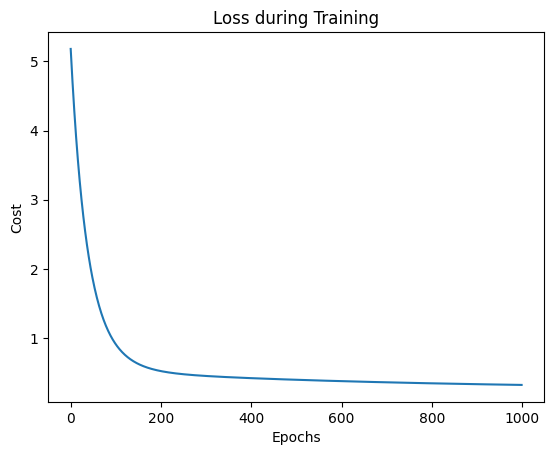

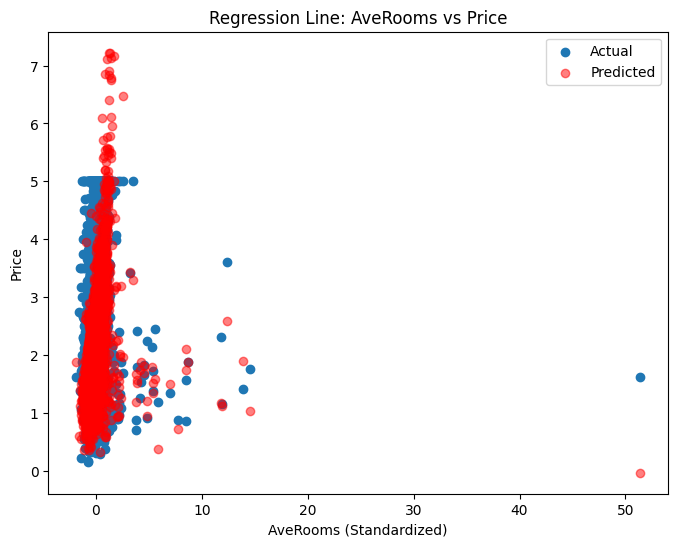

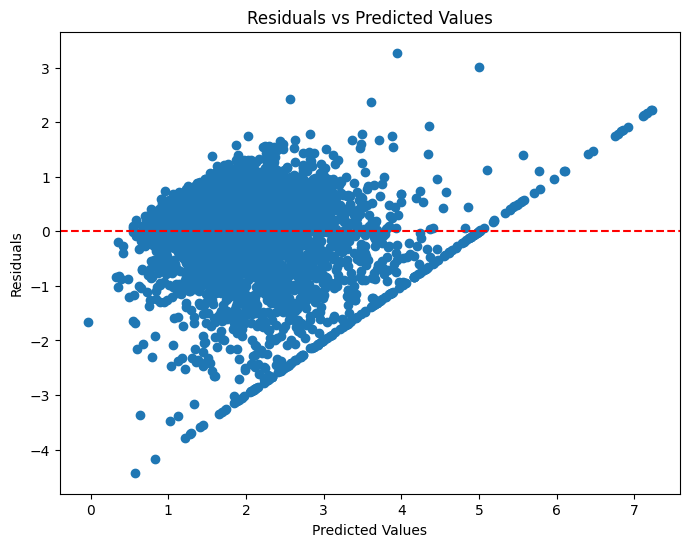

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Step 1: Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['price'] = data.target  # rename target for consistency

# Optional: normalize features
df[data.feature_names] = (df[data.feature_names] - df[data.feature_names].mean()) / df[data.feature_names].std()

# Step 2: Split into features and target
X = df.drop('price', axis=1).values
y = df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize weights and bias
w = np.random.randn(1, X_train.shape[1])
b = 0
learning_rate = 0.01

# Forward propagation
def for_prop(w, b, X):
    z = np.dot(w, X.T) + b
    return z.T

# Cost function (Mean Squared Error)
def cost(z, y):
    m = y.shape[0]
    j = (1 / (2 * m)) * np.sum(np.square(z - y))
    return j

# Backward propagation
def back_prop(z, y, X):
    m = y.shape[0]
    dz = z - y
    dw = (1 / m) * np.dot(dz.T, X)
    db = (1 / m) * np.sum(dz)
    return dw, db

# Gradient descent step
def gradient_descent(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# Training loop
def linear_model(X_train, y_train, X_test, y_test, epochs):
    global w, b
    losses = []
    for i in range(epochs):
        z = for_prop(w, b, X_train)
        c = cost(z, y_train)
        dw, db = back_prop(z, y_train, X_train)
        w, b = gradient_descent(w, b, dw, db, learning_rate)
        losses.append(c)
        if i % 100 == 0:
            print(f"Epoch {i} - Cost: {c:.4f}")
    return w, b, losses

# Train the model
w, b, losses = linear_model(X_train, y_train, X_test, y_test, epochs=1000)

# Predict
y_pred = for_prop(w, b, X_test)

# Evaluation
mse = np.mean(np.square(y_test - y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# Plot: Loss over epochs
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Loss during Training")
plt.show()

# Plot: Regression line (for one feature, e.g., AveRooms)
feature_index = data.feature_names.index('AveRooms')
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, feature_index], y_test, label='Actual')
plt.scatter(X_test[:, feature_index], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel("AveRooms (Standardized)")
plt.ylabel("Price")
plt.title("Regression Line: AveRooms vs Price")
plt.legend()
plt.show()

# Plot: Residuals
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

Epoch 0 - Cost: 7.0236
Epoch 100 - Cost: 0.7819
Epoch 200 - Cost: 0.3169
Epoch 300 - Cost: 0.2678
Epoch 400 - Cost: 0.2617
Epoch 500 - Cost: 0.2608
Epoch 600 - Cost: 0.2605
Epoch 700 - Cost: 0.2603
Epoch 800 - Cost: 0.2602
Epoch 900 - Cost: 0.2601

Evaluation Metrics:
MSE  = 0.5635
RMSE = 0.7507
R²   = 0.5699


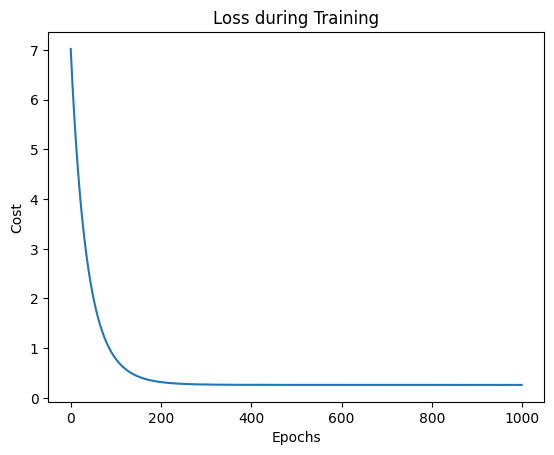

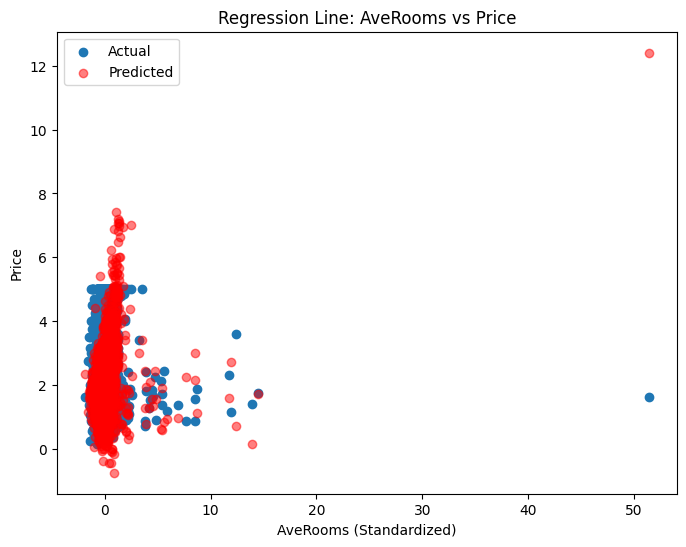

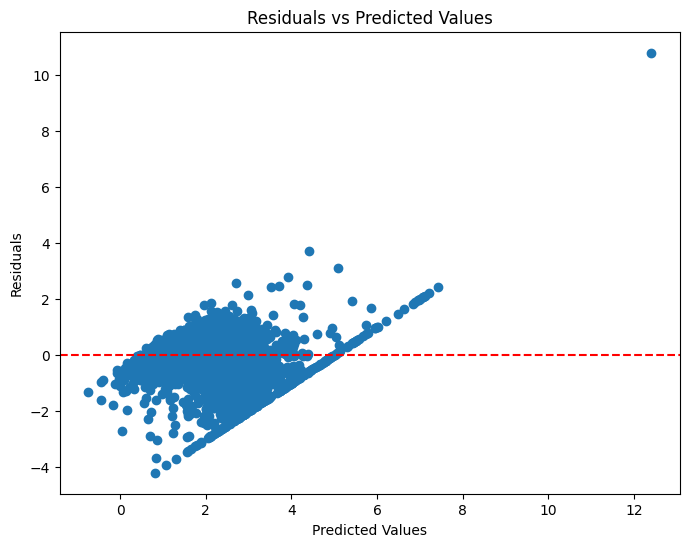

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Step 1: Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['price'] = data.target  # rename target for consistency

# Optional: normalize features
df[data.feature_names] = (df[data.feature_names] - df[data.feature_names].mean()) / df[data.feature_names].std()

# Step 2: Split into features and target
X = df.drop('price', axis=1).values
y = df['price'].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize weights and bias
w = np.random.randn(1, X_train.shape[1])
b = 0
learning_rate = 0.01

# Forward propagation
def for_prop(w, b, X):
    z = np.dot(w, X.T) + b
    return z.T

# Cost function (Mean Squared Error)
def cost(z, y):
    m = y.shape[0]
    j = (1 / (2 * m)) * np.sum(np.square(z - y))
    return j

# Backward propagation
def back_prop(z, y, X):
    m = y.shape[0]
    dz = z - y
    dw = (1 / m) * np.dot(dz.T, X)
    db = (1 / m) * np.sum(dz)
    return dw, db

# Gradient descent step
def gradient_descent(w, b, dw, db, learning_rate):
    w = w - learning_rate * dw
    b = b - learning_rate * db
    return w, b

# Training loop
def linear_model(X_train, y_train, X_test, y_test, epochs):
    global w, b
    losses = []
    for i in range(epochs):
        z = for_prop(w, b, X_train)
        c = cost(z, y_train)
        dw, db = back_prop(z, y_train, X_train)
        w, b = gradient_descent(w, b, dw, db, learning_rate)
        losses.append(c)
        if i % 100 == 0:
            print(f"Epoch {i} - Cost: {c:.4f}")
    return w, b, losses

# Train the model
w, b, losses = linear_model(X_train, y_train, X_test, y_test, epochs=1000)

# Predict
y_pred = for_prop(w, b, X_test)

# Evaluation
mse = np.mean(np.square(y_test - y_pred))
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluation Metrics:")
print(f"MSE  = {mse:.4f}")
print(f"RMSE = {rmse:.4f}")
print(f"R²   = {r2:.4f}")

# Plot: Loss over epochs
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.title("Loss during Training")
plt.show()

# Plot: Regression line (for one feature, e.g., AveRooms)
feature_index = data.feature_names.index('AveRooms')
plt.figure(figsize=(8,6))
plt.scatter(X_test[:, feature_index], y_test, label='Actual')
plt.scatter(X_test[:, feature_index], y_pred, color='red', label='Predicted', alpha=0.5)
plt.xlabel("AveRooms (Standardized)")
plt.ylabel("Price")
plt.title("Regression Line: AveRooms vs Price")
plt.legend()
plt.show()

# Plot: Residuals
residuals = y_pred - y_test
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()